## About the Data Set:
   **Aspiring Minds’ Employability Outcomes 2015 (AMEO 2015) is a unique dataset which contains engineering graduates’ employment outcomes (salaries, job titles and job locations) along with standardized assessment scores in three fundamental areas – cognitive skills, technical skills and personality. A relevant question is what determines the salary and the jobs these engineers are offered right after graduation. Various factors such as college grades, candidate skills, proximity of the college to industrial hubs, the specialization one has, market conditions for specific industries determine this. In our understanding, this is the first time anyone has release emoployment outcome data together with standardized assessment scores publicly.**


## Objective:
***1.Understanding the given data set of AMEO- 2015<br> 
2.Data cleaning<br> 
3.Finding the patterns in each columns <br>
4.Observing any relationships between both numerical and descrete columns and <br>
5.Conducting Hypothesis test on given claim***               

In [1]:
# imorting required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# loading and reading the data
df =pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')

In [3]:
#first five data points
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
# Reading the last five data points
df.tail()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943
3997,train,324966,400000,2013-02-01,present,senior systems engineer,Chennai,f,1991-02-26,70.60,...,-1,-1,-1,-1,-1,-1.1128,-0.2793,-0.6343,1.32553,-0.6035


In [5]:
# Number of rows and columns in the dataset
df.shape

(3998, 39)

In [6]:
# checkeing given column names in the dataset
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [7]:
#Type casting all the column names into lower case
colms = [col.lower()for col in df.columns]
df.columns =colms
df.columns

Index(['unnamed: 0', 'id', 'salary', 'doj', 'dol', 'designation', 'jobcity',
       'gender', 'dob', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'collegeid', 'collegetier', 'degree',
       'specialization', 'collegegpa', 'collegecityid', 'collegecitytier',
       'collegestate', 'graduationyear', 'english', 'logical', 'quant',
       'domain', 'computerprogramming', 'electronicsandsemicon',
       'computerscience', 'mechanicalengg', 'electricalengg', 'telecomengg',
       'civilengg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   unnamed: 0             3998 non-null   object        
 1   id                     3998 non-null   int64         
 2   salary                 3998 non-null   int64         
 3   doj                    3998 non-null   datetime64[ns]
 4   dol                    3998 non-null   object        
 5   designation            3998 non-null   object        
 6   jobcity                3998 non-null   object        
 7   gender                 3998 non-null   object        
 8   dob                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [9]:
# Statistical data description about numerical columns
df.describe(include =['float64','int64'])

,id,salary,10percentage,12graduation,12percentage,collegeid,collegetier,collegegpa,collegecityid,collegecitytier,...,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [10]:
#Statistical data description about descrete columns
df.describe(include =['object'])

,unnamed: 0,dol,designation,jobcity,gender,10board,12board,degree,specialization,collegestate
count,3998,3998,3998,3998,3998,3998,3998,3998,3998,3998
unique,1,67,419,339,2,275,340,4,46,26
top,train,present,software engineer,Bangalore,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh
freq,3998,1875,539,627,3041,1395,1400,3700,880,915


In [11]:
# Unique values in each column
df.nunique()

unnamed: 0                  1
id                       3998
salary                    177
doj                        81
dol                        67
designation               419
jobcity                   339
gender                      2
dob                      1872
10percentage              851
10board                   275
12graduation               16
12percentage              801
12board                   340
collegeid                1350
collegetier                 2
degree                      4
specialization             46
collegegpa               1282
collegecityid            1350
collegecitytier             2
collegestate               26
graduationyear             11
english                   111
logical                   107
quant                     138
domain                    243
computerprogramming        79
electronicsandsemicon      29
computerscience            20
mechanicalengg             42
electricalengg             31
telecomengg                26
civilengg 

# Exploratory Data  Analysis (EDA)

In [12]:
#Checking the null values 
df.isnull().sum()

unnamed: 0               0
id                       0
salary                   0
doj                      0
dol                      0
designation              0
jobcity                  0
gender                   0
dob                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
collegeid                0
collegetier              0
degree                   0
specialization           0
collegegpa               0
collegecityid            0
collegecitytier          0
collegestate             0
graduationyear           0
english                  0
logical                  0
quant                    0
domain                   0
computerprogramming      0
electronicsandsemicon    0
computerscience          0
mechanicalengg           0
electricalengg           0
telecomengg              0
civilengg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [13]:
# Droping the unneccessary columns
df.drop(['unnamed: 0','doj','dol','collegeid','collegecityid','graduationyear','12graduation'],axis =1,inplace = True)

In [14]:
#Setting id columns as index
df=df.set_index(['id'])

## Univariate

## jobcity

In [15]:
df.jobcity.unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', -1, 'mohali',
       'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida', 'delhi',
       'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi', 'Mangalore',
       'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon', '

In [16]:
df['jobcity'] = df['jobcity'].apply(lambda x:str(x).lower())
df['jobcity'] = df['jobcity'].apply(lambda x : x.lstrip())
df['jobcity'] = df['jobcity'].apply(lambda x : x.rstrip())


In [17]:
hyd =[]
for i in df.jobcity:
    if i[0]=='h':
        hyd.append(i)
hyd       

['hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'haridwar',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hissar',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderabad',
 'hyderaba

In [18]:
lst =[]
for i in df.jobcity:
    if i[0]=='b':
        lst.append(i)
lst      

['bangalore',
 'banglore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bhubaneswar',
 'bangalore',
 'bhiwadi',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bhubaneshwar',
 'bangalore',
 'bhubaneswar',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bhagalpur',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bankura',
 'bangalore',
 'bengaluru',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'beawar',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bangalore',
 'bhopal',
 'bangalor

In [19]:
lst1 =[]
for i in df.jobcity:
    if i=='bangalore':
        lst1.append(i)
print(lst1)

['bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore', 'bangalore'

In [20]:
df.jobcity =df.jobcity.apply(lambda i:'banglore ' if i=='bangalore ' or i =='-1' or i=='bangalore' or i =='bengaluru' or  i=='asifabadbanglore' or i =='bangalore' else 'hyderabad'  if i=='hyderabad(bhadurpally)' or i =='secunderabad' else 'ambala' if i=='ambala city' else 'saudi' if i =='al jubail,saudi arabia' or i == 'saudi arabia' or i =='jeddah saudi arabia' else  'noida' if i =='a-64,sec-64,noida' or i=='greater noida' or i =='nouda' else 'chennai' if i =='chennai & mumbai' or  i =='chennai, bangalore' else 'mumbai' if i =='navi mumbai' else  'delhi' if i =='delhi/ncr' or i =='new delhi' or i =='new delhi - jaisalmer'  or i =='new delhi 'else 'cochin' if i =='kochi/cochin' else 'panchkula' if  i=='punchkula' else 'trivandrum' if i =='thiruvananthapuram' else 'vizag' if i =='vsakhapttnam' or i =='visakhapatnam' or i == 'visakhapatnam' else 'manipuri' if i =='mainpuri' else i  )

In [21]:
df['jobcity'].loc[lambda x: x=='am'].index

Int64Index([299447], dtype='int64', name='id')

In [22]:
df.index[df['jobcity']=='sadulpur,rajgarh,distt-churu,rajasthan'].tolist()

[794088]

In [23]:
df['jobcity'].loc[lambda x: x=='india'].index

Int64Index([1053599], dtype='int64', name='id')

In [24]:
df['jobcity'].loc[lambda x: x=='indirapuram, ghaziabad'].index


Int64Index([350819], dtype='int64', name='id')

In [25]:
df['jobcity'].loc[lambda x: x=='latur (maharashtra )'].index

Int64Index([133328], dtype='int64', name='id')

In [26]:
df['jobcity'].loc[lambda x: x=='indirapuram, ghaziabad'].index

Int64Index([350819], dtype='int64', name='id')

In [27]:
df['jobcity'].loc[lambda x: x=='rayagada, odisha'].index

Int64Index([642309], dtype='int64', name='id')

In [28]:
df.index[df['jobcity']=='sadulpur,rajgarh,distt-churu,rajasthan']

Int64Index([794088], dtype='int64', name='id')

In [29]:
df.index[df['jobcity']=='una']

Int64Index([1089283], dtype='int64', name='id')

In [30]:
df.index[df['jobcity']=='navi mumbai , hyderabad']

Int64Index([1089038], dtype='int64', name='id')

Dropping unncessasary rows

In [31]:
df = df.drop (index= [299447,350819,133328,642309,794088,1053599,1089283,1089038])


In [32]:
df.shape

(3990, 31)

<AxesSubplot:>

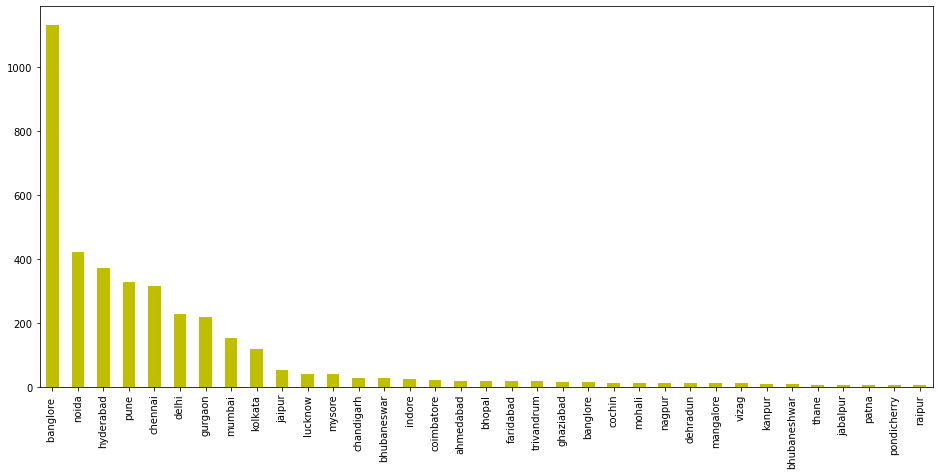

In [33]:
df.jobcity.value_counts().head(35).plot(kind ='bar',color ='y',figsize=(16,7))

Observations:
In top 35 cities,
- Most of the students were placed in banglore and its count seems to be nearly 1300
- After banglore,noida and hyderabad were  occupied the 2nd and 3rd places respectively. Their count were nearly 400, 380  respectively

## Designation

In [34]:
df.designation.unique()


array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

In [35]:
df.designation =df.designation.apply(lambda k: "assistant software engineer" if k =='ase' else 'graduate engineer trainee' if k =='get' else 'cad engineer' if k =='gis/cad engineer' else 'website developer' if k =='website developer/tester' else 'software test engineer' if k =='software test engineer (etl)' else 'system engineer' if k =='systems engineer' else 'soft engineer' if k =='software eng' else k)

<AxesSubplot:>

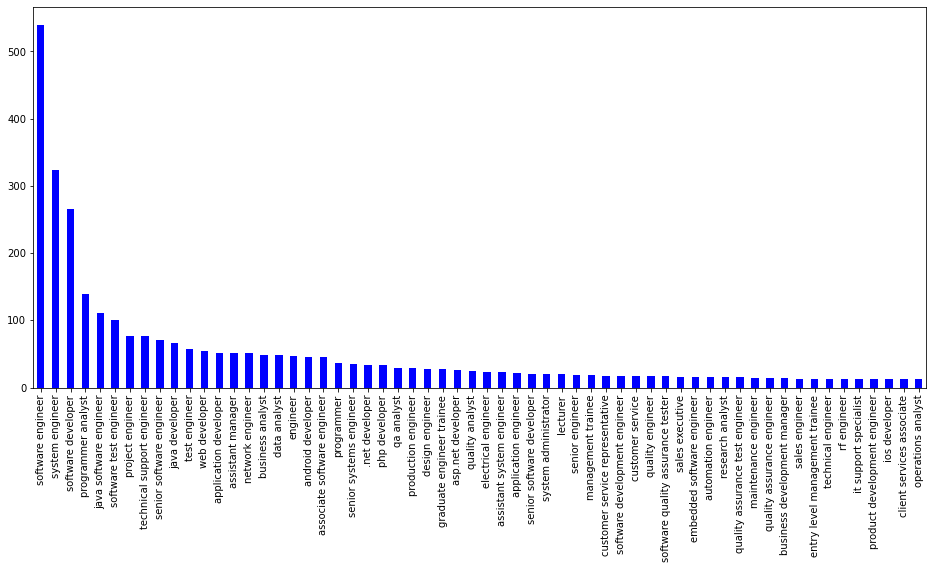

In [36]:
df.designation.value_counts().head(60).plot(kind ='bar',color ='b',figsize=(16,7))

Observations:
In top 60 designations,
- Software engineers occupied the first place.Thier count was nearly 550
- system engineer and software developers were the dominent roles after the software engineers.their count were nearly 320,270 respectively
- "sales engineer,              
client services associate,             
product development engineer,         
it support specialist,                 
ios developer,                      
entry level management trainee,        
rf engineer,                           
technical engineer,                  
oracle dba "
were least roles and thier count was below 20.



# Specialization

In [37]:
(df == -1).astype(int).sum(axis=0) #counting the number of -1's per column

salary                      0
designation                 0
jobcity                     0
gender                      0
dob                         0
10percentage                0
10board                     0
12percentage                0
12board                     0
collegetier                 0
degree                      0
specialization              0
collegegpa                  0
collegecitytier             0
collegestate                0
english                     0
logical                     0
quant                       0
domain                    245
computerprogramming       865
electronicsandsemicon    2850
computerscience          3088
mechanicalengg           3757
electricalengg           3829
telecomengg              3616
civilengg                3950
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to_experience       0
dtype: int64

In [38]:
df.computerprogramming =df.computerprogramming.apply(lambda i:0 if i==-1 else i)

In [39]:
df.computerprogramming.nunique()

79

In [40]:
df.electronicsandsemicon =df.electronicsandsemicon.apply(lambda i:0 if i ==-1 else i)

In [41]:
df.electronicsandsemicon.unique()

array([  0, 466, 233, 366, 324, 266, 333, 356, 420, 260, 228, 388, 300,
       292, 433, 196, 200, 164, 400, 484, 500, 452, 516, 166, 533, 566,
       612, 133, 548], dtype=int64)

In [42]:
df.computerscience =df.computerscience.apply(lambda k: 0 if k ==-1 else k)


In [43]:
df.computerscience.unique()

array([  0, 407, 346, 376, 500, 438, 315, 253, 469, 192, 530, 284, 223,
       561, 684, 592, 623, 653, 130, 715], dtype=int64)

In [44]:
df.mechanicalengg =df.mechanicalengg.apply(lambda m : 0 if m==-1 else m)

In [45]:
df.mechanicalengg.unique()

array([  0, 469, 313, 286, 253, 366, 446, 206, 438, 332, 393, 383, 260,
       561, 553, 376, 526, 284, 409, 473, 340, 223, 420, 538, 346, 435,
       512, 407, 580, 280, 358, 500, 315, 254, 616, 564, 233, 306, 461,
       180, 606, 623], dtype=int64)

In [46]:
df.electricalengg =df.electricalengg.apply(lambda e: 0 if e==-1 else e)

In [47]:
df.electricalengg.unique()

array([  0, 484, 606, 393, 500, 553, 580, 446, 420, 324, 388, 356, 313,
       633, 516, 366, 612, 452, 526, 548, 228, 433, 473, 676, 292, 660,
       411, 286, 340, 260, 206], dtype=int64)

In [48]:
df.telecomengg =df.telecomengg.apply(lambda t :0 if t ==-1 else t)

In [49]:
df.civilengg =df.civilengg.apply(lambda c :0 if c ==-1 else c)

In [50]:
df.domain =df.domain.apply(lambda d:0 if d ==-1 else d)

<AxesSubplot:>

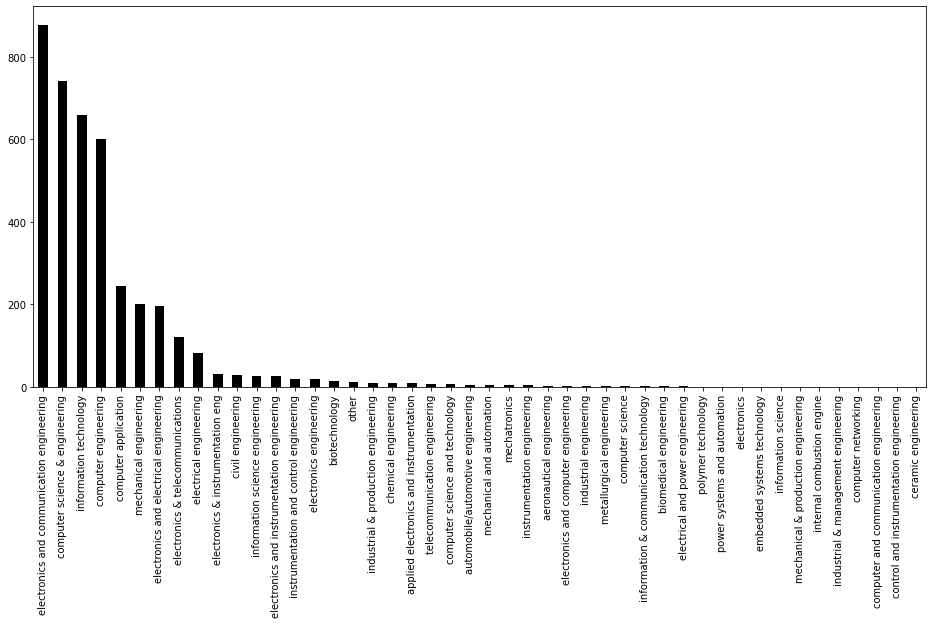

In [51]:
df.specialization.value_counts().plot(kind ='bar',color ='k',figsize=(16,7))

Observation,<br>
***1.The most repeating specialization was 'electronics and communication engineering' and its mode was 850<Br>
2.The next three top specializations were 'computer science & engineering','information technology' and 'computer <br> engineering'.The freq.of the students were nearly 750,650,600 respectively <br>
3.The least specilizations were
'control and instrumentation engineering',   
'internal combustion engine',                     
'computer networking',                              
'electronics',                                      
'computer and communication engineering',           
'polymer technology',                               
'embedded systems technology',                      
'mechanical & production engineering',              
'power systems and automation',                     
'industrial & management engineering',              
'information science',                              
'ceramic engineering'. and their count was negligible***                            

## Degree

In [52]:
df.degree.unique()

array(['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)'],
      dtype=object)

In [53]:
df.degree =df.degree.apply(lambda x:(x.lower()))

In [54]:
df.degree.unique()

array(['b.tech/b.e.', 'mca', 'm.tech./m.e.', 'm.sc. (tech.)'],
      dtype=object)

In [55]:
df.degree =df.degree.apply(lambda x:'b.tech.' if x == 'b.tech/b.e.' else 'm.tech.'if x=='m.tech./m.e.' else 'm.sc' if x=='m.sc. (tech.)' else x)

In [56]:
df.degree.unique()

array(['b.tech.', 'mca', 'm.tech.', 'm.sc'], dtype=object)

<AxesSubplot:>

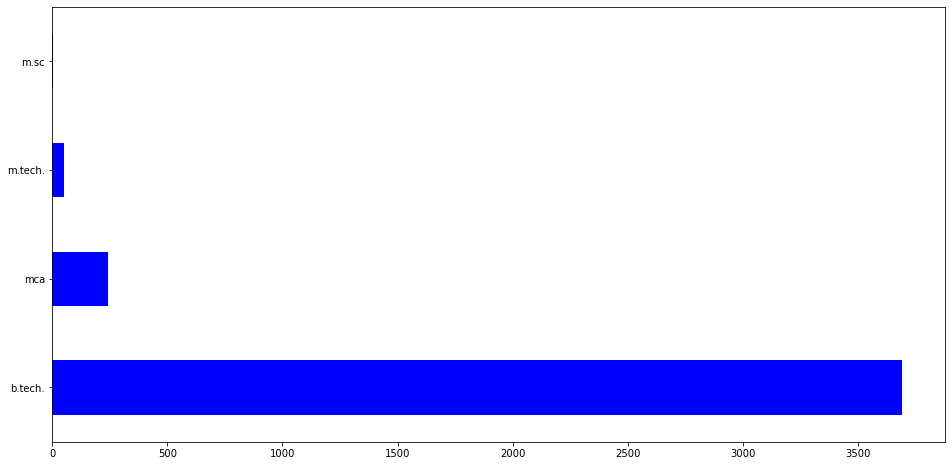

In [57]:
df.degree.value_counts().plot(kind ='barh',color ='b',figsize =(16,8))

### Observations,
- Majority of the students pursued b.tech degree. The count was nearly 3700.                                                     
- The least degree pursued by the students was m.sc and its count was negligible

## 12Board

In [58]:
df['12board'].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 0, 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate sta

In [59]:
b_12 =[]
for i in df['12board']:
    if i=='cbse':
        print(i)

cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse
cbse


In [60]:
df['12board']=df['12board'].apply(lambda i: 'cbse'if i=='all india board' or i =='central board of secondary education, new delhi'or i == 'cbese' else 'icse' if i=='isc'or i== 'icse'or i == 'isc board'or i=='isce'or i== 'cicse'or i =='isc board , new delhi'  else 'n/a' if i==0 else 'state')

In [61]:
df['12board'].unique()

array(['state', 'icse', 'n/a', 'cbse'], dtype=object)

In [62]:
df['12board'].replace(to_replace ="n/a",value ="state",regex =True,inplace =True)

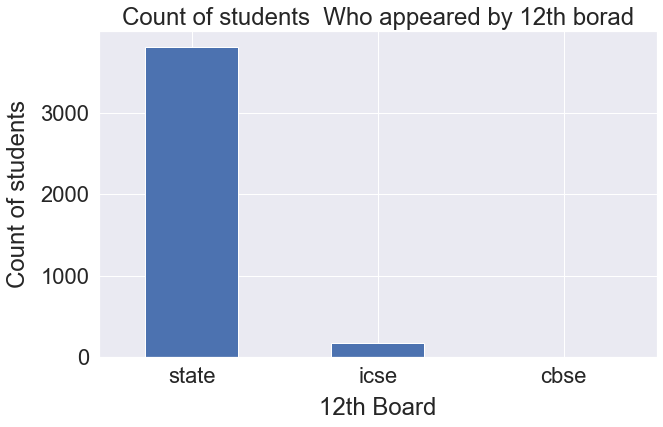

In [63]:
sns.set(font_scale=2)
df['12board'].value_counts().plot(kind='bar', figsize=(10, 6), rot=0)
plt.xlabel("12th Board", labelpad=10)
plt.ylabel("Count of students", labelpad=10)
plt.title("Count of students  Who appeared by 12th borad", y=1);


### observations,
***1.Most of the students studied the state board in 12th standard. freq of students were almost 4000  <br>                     2.cbse studied students were negligible***

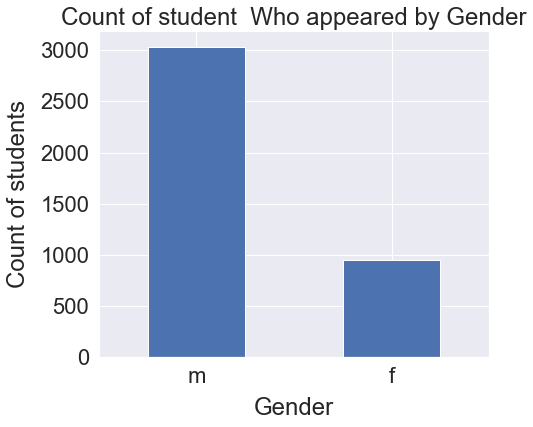

In [64]:
sns.set(font_scale=2)
df['gender'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Gender", labelpad=10)
plt.ylabel("Count of students", labelpad=10)
plt.title("Count of student  Who appeared by Gender", y=1);


### Observations,                                                                                                                 
- Male candidates were participated more in the exam and their count was 300                                                   
- Female count was around 1000

## college state

In [65]:
df['collegestate'] =df['collegestate'].apply(lambda i:i.lower())

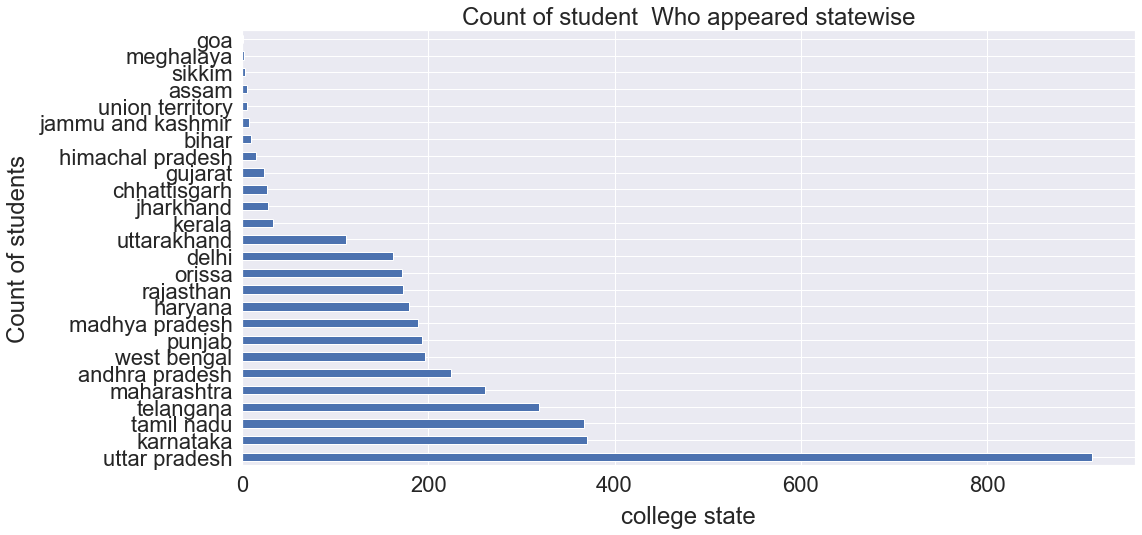

In [66]:
sns.set(font_scale=2)
df['collegestate'].value_counts().plot(kind='barh', figsize=(16, 8), rot=0)
plt.xlabel("college state", labelpad=10)
plt.ylabel("Count of students", labelpad=10)
plt.title("Count of student  Who appeared statewise", y=1);


### observations,
***1.Majority of the students were from the uttar pradesh  and their fre was almost 900. <br>
   2.The moderate states were orissa,rajstan,haryana,madyapradesh west bengal,punjab and their count was nearly 200 <br>
   3.The least states were goa ,meghagala, sikkim,union territory and thier freq was in single digits ***

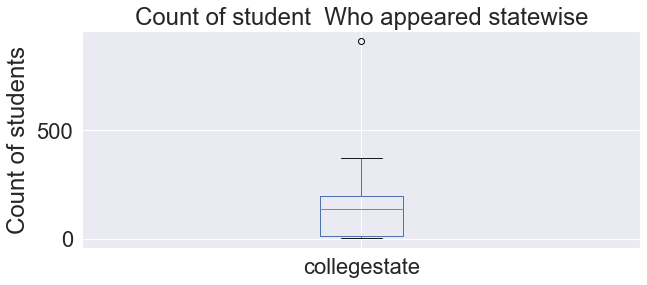

In [67]:
sns.set(font_scale=2)
df['collegestate'].value_counts().plot(kind='box', figsize=(10, 4), rot=0)
#plt.xlabel("college state", labelpad=10)
plt.ylabel("Count of students", labelpad=6)
plt.title("Count of student  Who appeared statewise", y=1);


### observations,
- Only one state has outlies in the state column and its count was nealy 900 <br>
- The median of the studens was between 150 -200

## collegetier

<AxesSubplot:>

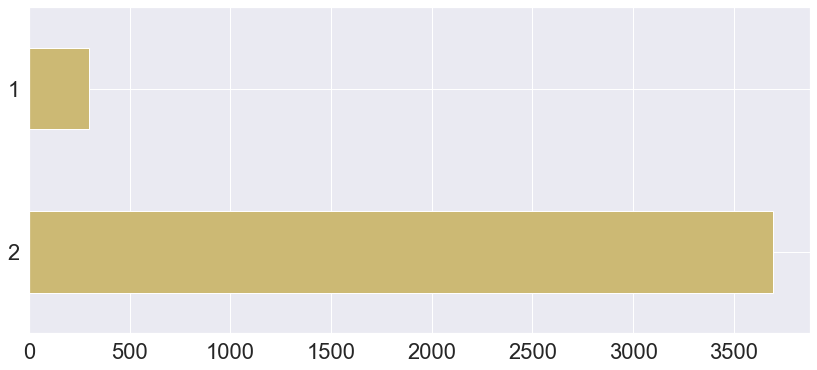

In [68]:
df.collegetier.value_counts().plot(kind ='barh',color ='y',figsize =(14,6))

### observations
__1.Students were from tier1 and tier2 colleges only <br>
2.comparatively most of the student from tier2.there were almost 3700 students from tier2 colleges <br>
3.very less students from tier1 college and thier count was nealy 300__


<AxesSubplot:>

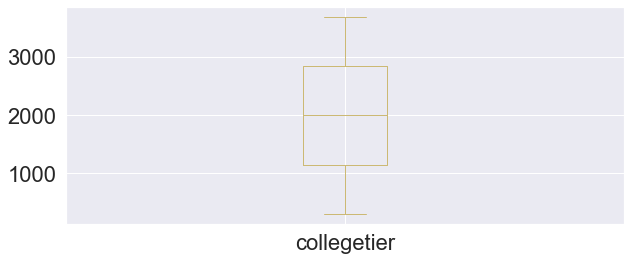

In [69]:
df.collegetier.value_counts().plot(kind ='box',color ='y',figsize =(10,4))

### observations
- No outliers in the collegetier column
- the median of the collegetier was 2000 
- Q3 ,Q1 were almost 3000 and 1000 respectively

## 10board

In [70]:
df['10board'].value_counts().head(60)

cbse                                               1389
state board                                        1163
0                                                   350
icse                                                281
ssc                                                 122
up board                                             85
matriculation                                        38
rbse                                                 23
board of secondary education                         20
up                                                   19
mp board                                             17
sslc                                                 16
wbbse                                                16
central board of secondary education                 13
kseeb                                                12
upboard                                              11
maharashtra state board                              11
karnataka state board                           

In [71]:
df['10board'] =df['10board'].apply(lambda i:str(i).lower())

In [72]:
df['10board'] =df['10board'].apply(lambda i: 'cbse' if i =='cbse' else 'icse' if i =='icse' else 'ssc')

In [73]:
df['10board'].unique()

array(['ssc', 'cbse', 'icse'], dtype=object)

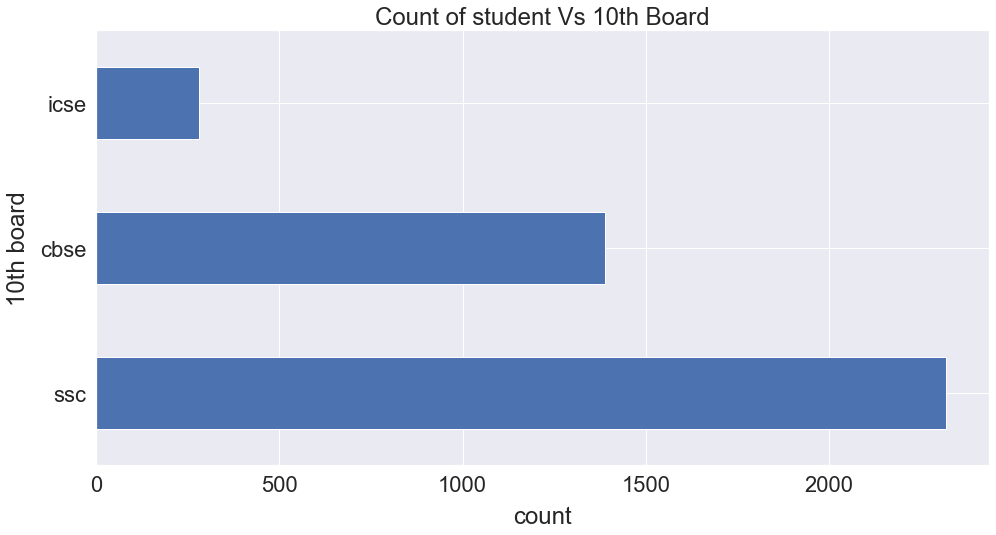

In [74]:
sns.set(font_scale=2)
df['10board'].value_counts().plot(kind='barh', figsize=(16, 8), rot=0)
plt.xlabel("count", labelpad=10)
plt.ylabel("10th board", labelpad=10)
plt.title("Count of student Vs 10th Board", y=1);


### Observations,
- There were only three 10th boars in the data set
- Among them,nearly 2300 students appered by SSC board
- the next major shared board was cbse,its count was nearly 1300 students
-  the least 10th board students was icse and its freq was 250 

In [75]:
city_salary =df.groupby(['jobcity']).agg({'salary':['min','max','mean']})

In [76]:
city_salary.head()

salary                  
               min     max      mean
jobcity                             
agra        100000  200000  150000.0
ahmedabad    80000  715000  270000.0
ahmednagar  310000  335000  322500.0
allahabad   225000  225000  225000.0
alwar       240000  240000  240000.0

# Numeric attributes

In [77]:
df.describe(include =['int64','float64'])

,salary,10percentage,12percentage,collegetier,collegegpa,collegecitytier,english,logical,quant,domain,...,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.990000e+03,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,...,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000
mean,3.077830e+05,77.933348,74.468253,1.925815,71.503677,0.300752,501.765163,501.737343,513.402506,0.572086,...,91.700251,23.740100,17.473434,32.823308,3.518296,-0.037247,0.147349,0.003464,-0.169271,-0.138414
std,2.128328e+05,9.841889,11.000110,0.262105,8.103336,0.458642,104.877102,86.659901,122.212978,0.302425,...,174.994858,97.527115,87.478171,104.663299,35.856669,1.028547,0.941487,0.951646,1.007741,1.008305
min,3.500000e+04,43.000000,40.000000,1.000000,6.450000,0.000000,180.000000,195.000000,120.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,1.800000e+05,71.737500,66.000000,2.000000,66.452500,0.000000,425.000000,445.000000,430.000000,0.342315,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.726400,-0.287100,-0.604800,-0.868200,-0.669200
50%,3.000000e+05,79.180000,74.400000,2.000000,71.720000,0.000000,500.000000,505.000000,515.000000,0.622643,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,3.700000e+05,85.670000,82.600000,2.000000,76.352500,1.000000,570.000000,565.000000,595.000000,0.842248,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,4.000000e+06,97.760000,98.700000,2.000000,99.930000,1.000000,875.000000,795.000000,900.000000,0.999910,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


### salary

<AxesSubplot:>

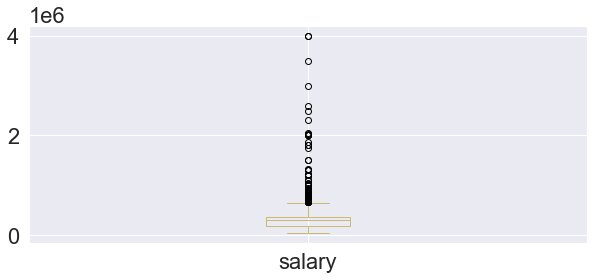

In [78]:
df.salary.plot(kind ='box',color ='y',figsize =(10,4))

### observations
- there were many outlies in the salary column
- more outlies lied between 10lakh to 20lakhs
- max salary was nealy 40lakhs

In [79]:
df.salary.value_counts().tail(50)

590000     2
40000      2
605000     2
535000     2
750000     2
580000     2
675000     2
1800000    2
690000     2
645000     2
660000     2
850000     2
545000     2
715000     2
4000000    2
144000     1
930000     1
1860000    1
705000     1
1745000    1
1110000    1
2050000    1
2020000    1
910000     1
770000     1
860000     1
950000     1
880000     1
925000     1
585000     1
2600000    1
810000     1
900000     1
785000     1
670000     1
760000     1
2300000    1
3500000    1
1030000    1
55000      1
1210000    1
870000     1
2500000    1
3000000    1
1050000    1
755000     1
845000     1
1320000    1
1025000    1
725000     1
Name: salary, dtype: int64

### observartion
- majority of the students got the packege of below 10 lakhs
- the count of them was nearly 3800 

<AxesSubplot:xlabel='salary', ylabel='Count'>

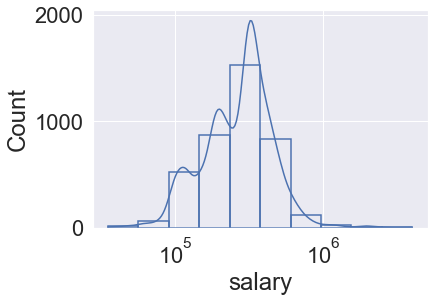

In [80]:
sns.histplot(data=df, x="salary",bins=10,log_scale=True,fill =False,kde =True)

### observations
- very less people got the salary less than 1 lakh and more than 40 lakh
- there were nealy 900 students who got the salary of 20 lakh and 1500 students who got 

## 12th percentage

<AxesSubplot:ylabel='Frequency'>

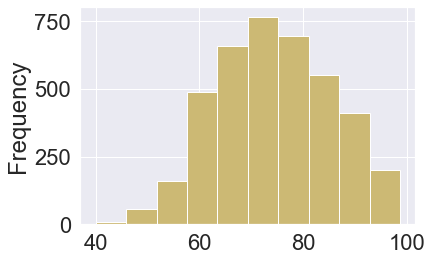

In [81]:
df['12percentage'].plot(kind = 'hist',color ='y',bins =10)

### 12th percentage

<AxesSubplot:xlabel='12percentage', ylabel='Density'>

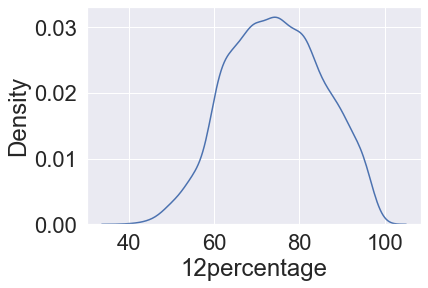

In [82]:
sns.kdeplot(data =df,x ='12percentage')

### observations
- the majority of the 12percentage lied between 40% and 100%
- its seems  like a normal distribution mean 70%


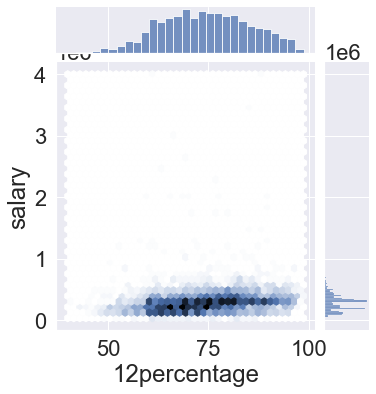

In [83]:
sns.jointplot(data =df,x ='12percentage',y ='salary',kind ='hex')

### observations
- percentage values were mostly concentrated at 75% and there only few students got below 60 and above 90
- the salary of the students mostly around one l0 lakhs

<AxesSubplot:>

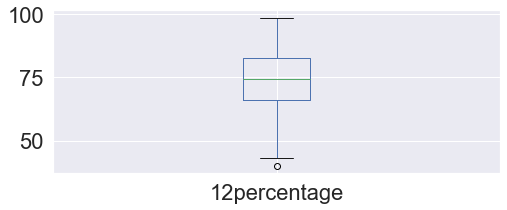

In [84]:
df['12percentage'].plot(kind ='box',figsize=(8,3))

### observations
- only one outlier in this column
- it was around below 30%

<AxesSubplot:xlabel='collegegpa', ylabel='salary'>

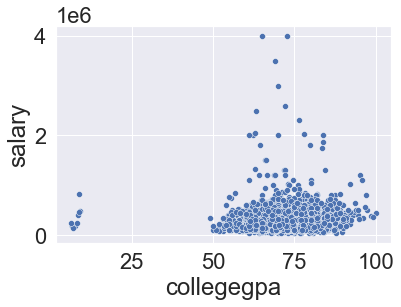

In [85]:
sns.scatterplot(data =df,x ='collegegpa',y ='salary',)

### college-GPA

<AxesSubplot:xlabel='collegegpa', ylabel='Density'>

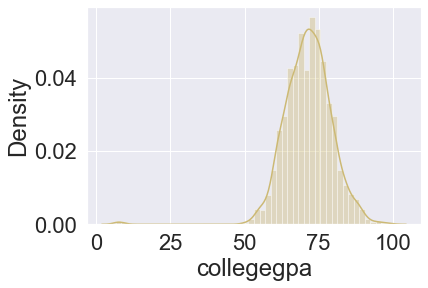

In [86]:
sns.distplot(df.collegegpa,color ='y',bins =50)

### observations
- the college -GPA of majority students lied between 50 and 100
- the density was more at 75 and very negligible at 10



<AxesSubplot:>

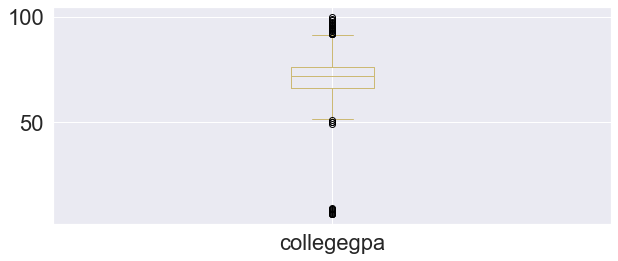

In [87]:
df.collegegpa.plot(kind ='box',color ='y',figsize =(10,4))

### observations
- there were many outlies in the college-GPA in the both extremes
- they were seems above 90,at50 and near to 10 to 20
- the median of the collegegpa was around 75

<AxesSubplot:>

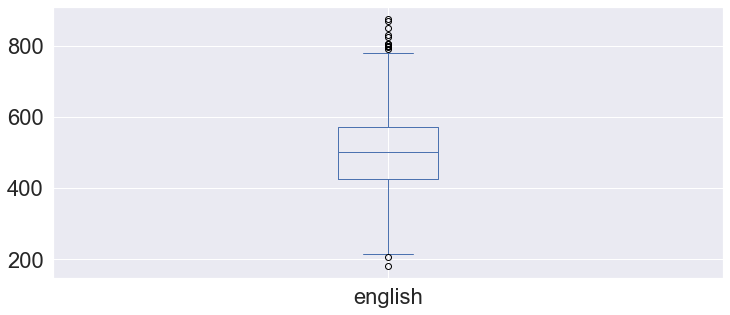

In [88]:
plt.figure(figsize=(12,5))
df.english.plot(kind ='box',color ='b')

<AxesSubplot:xlabel='english', ylabel='Density'>

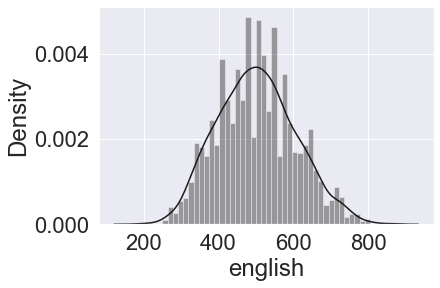

In [89]:
sns.distplot(df.english,color ='k',bins =50)

### observations
- English score lied between 200 and 800 and it seems like following normal distribution
- majority of the students got 450 to 500 
-   it seems high freq around 400 ,500 and 550 

<AxesSubplot:xlabel='english'>

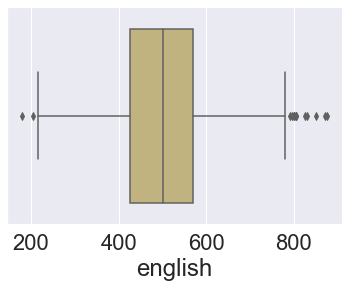

In [90]:
sns.boxplot(df.english,color='y')

### observations
- english score has outlies in the both extremes
- many outlies were in the higher extreme and they were near 800
- the lower extreme outlies were at below 200.
- the median of it was close to 500

<AxesSubplot:xlabel='logical', ylabel='Density'>

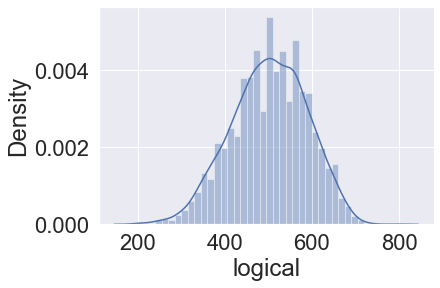

In [91]:
sns.distplot(df.logical)

### observations
- it was also lied between 200 and 800 and seems to following normal distribution
- most of the students got 500 score in the logical 



<AxesSubplot:xlabel='logical'>

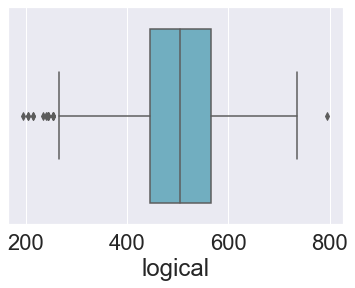

In [92]:
sns.boxplot(df.logical,color='c')

### observations
- it has outliers in the both extremes
- many outliers in the lower extremes below 250. it count was around 6 
- higher extreme outlier was around 800 and it count was only 1

<AxesSubplot:>

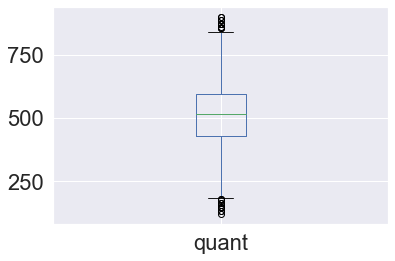

In [93]:
df.quant.plot(kind ='box')

### observations
- there were many outlies in the both extrems and they were above 800 and below 200 
- median of the quant was around 500

<AxesSubplot:xlabel='quant', ylabel='Density'>

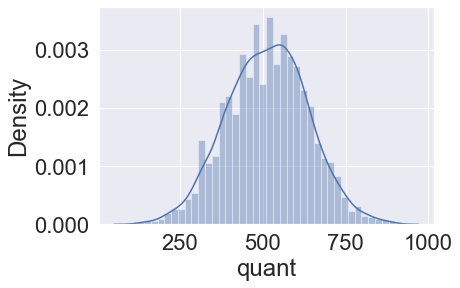

In [94]:
sns.distplot(df.quant)

### observations 
- the quant range lied between 250 and 1000
- it was also following normal dist.
- majority of the students got 500 score in the quant section


<AxesSubplot:>

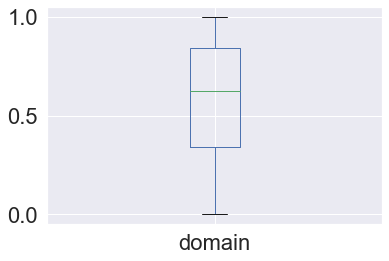

In [95]:
df.domain.plot(kind ='box')

### observations
- the domain section had no outliers
- the mediann of the domain around 0.70

<AxesSubplot:xlabel='domain', ylabel='Density'>

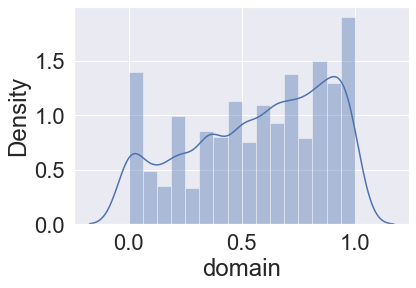

In [96]:
sns.distplot(df.domain)

### observations
- the domain score has the limits 0 to 1
- high freq was at 0 and 1 and many fluctuations in the domain section.

## Bivariate

<AxesSubplot:xlabel='jobcity', ylabel='count'>

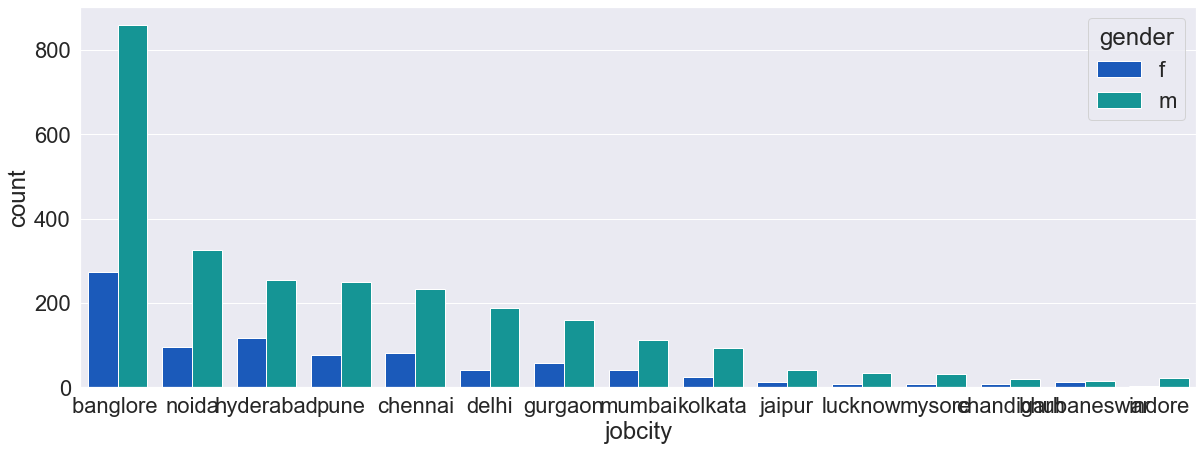

In [97]:
plt.figure(figsize=(20,7))
sns.countplot(df.jobcity ,order=df.jobcity.value_counts().iloc[:15].index,data =df,palette='winter',hue ='gender')

### observations
from top 15 jobcities
- the count male  and female candidates from banglore city was around 900 and 250
- if we concidered any city the male candidates got more selected
- in indore only male candidates got selected

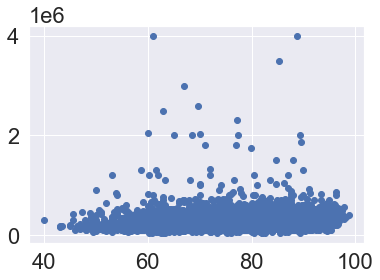

In [98]:
plt.scatter(data =df,x ='12percentage',y='salary')

### observations
- many datapoint has zero correlation and very few students has postive correlation between 12percentage and salary
- students who got more than 20 lakhs and 60 to 95 percentage have positive correction

<AxesSubplot:xlabel='salary', ylabel='collegegpa'>

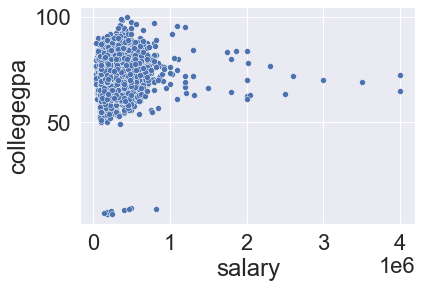

In [99]:
sns.scatterplot(data=df,x ='salary',y ='collegegpa')

### observations
- many students has zero correlation even if they got above 50 collegegpa
- students who got nearly 80-90 percentage and above 40 lakhs salary has positive corrlations


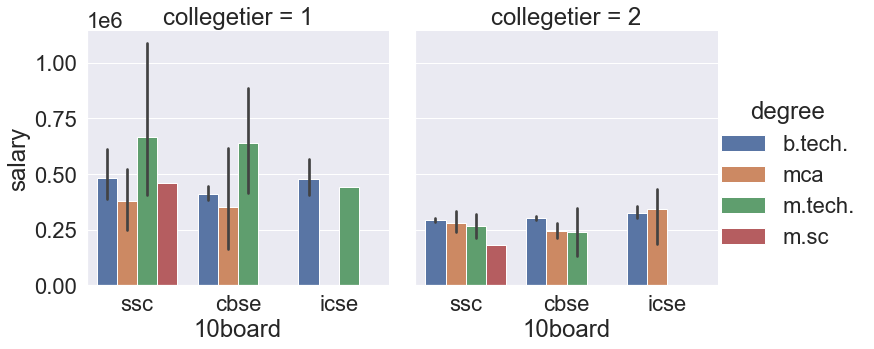

In [100]:
g = sns.catplot(x="10board", y="salary",
                hue="degree", col="collegetier",
                data=df, kind="bar")

### observations
- from collegetier1 who studied m.tech and from 10th board has got more salary compartively remaing things
- from collegetier2 who studeid icse and from the 10th board has got more salary
- no student studied m.sc from the collegetier2

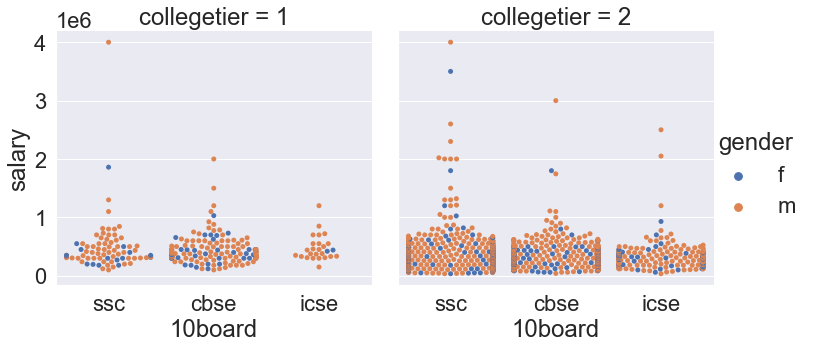

In [101]:
g = sns.catplot(x="10board", y="salary",
                hue="gender", col="collegetier",
                data=df, kind="swarm")

### observations
- from both tier1 and tier2 colleges male condidates has more salary and it is more from ssc 
- from tier2 in ssc male and females has got same salary
- even from tier1 college who studied cbse board has got same salary


<Figure size 2160x864 with 0 Axes>

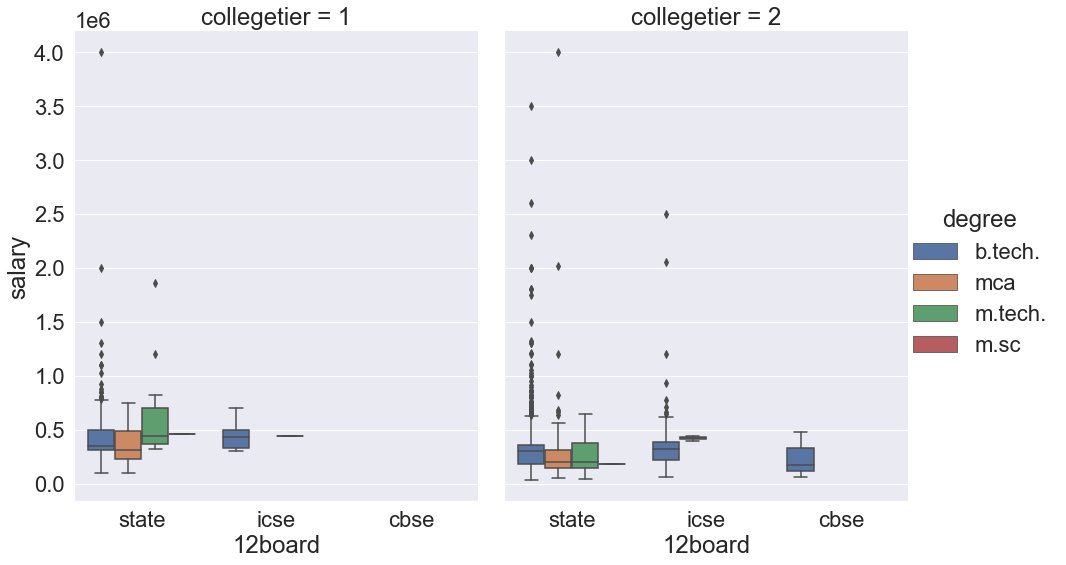

In [102]:
plt.figure(figsize =(30,12))
m= sns.catplot(x="12board", y="salary",
                hue="degree", col="collegetier",
                data=df, kind="box",
                height=8, aspect=.8)

### observations
- students who  did their 12th from state board and  degree from b.tech in tier1 has more salary and more outlieres and outlies  above 0.75 lakhs
 - students who  did their 12th from state board and  degree from mca in tier1 has no outlieres.
 - students who  did their 12th from state board and  degree from m.tech in tier1 has more salary and more outlieres and outlies between 10.3 -20 lakhs
 - students who  did their 12th from state board and  degree from b.tech in tier2 has more salary and more outlieres and outlies above 0.60 lakhs

''

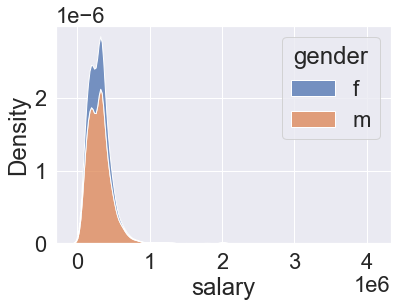

In [103]:
plt.figure(figsize =(6,4))
sns.kdeplot(data=df, x="salary", hue="gender", multiple='stack')


### observations
- the salary density was more for female candidates and salary range was below 10lakhs only

<function matplotlib.pyplot.text(x, y, s, fontdict=None, **kwargs)>

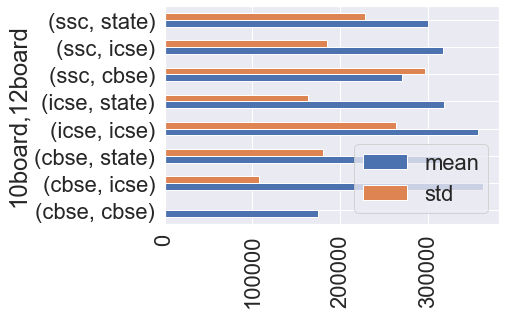

In [104]:
plt.figure
df.groupby(['10board','12board'])['salary'].agg(['mean','std']).plot(kind ='barh')
plt.xticks(rotation =90)
plt.text

### observations
- the salary mean was huge in case of 12th and 10th boards were icse and icse 
- the std was more in case of ssc and cbse and its value was nealry 30lakhs


In [105]:
df1 =df.groupby(['salary'])['english','logical','quant','domain'].sum()

In [106]:
df1.reset_index('salary',inplace=True)

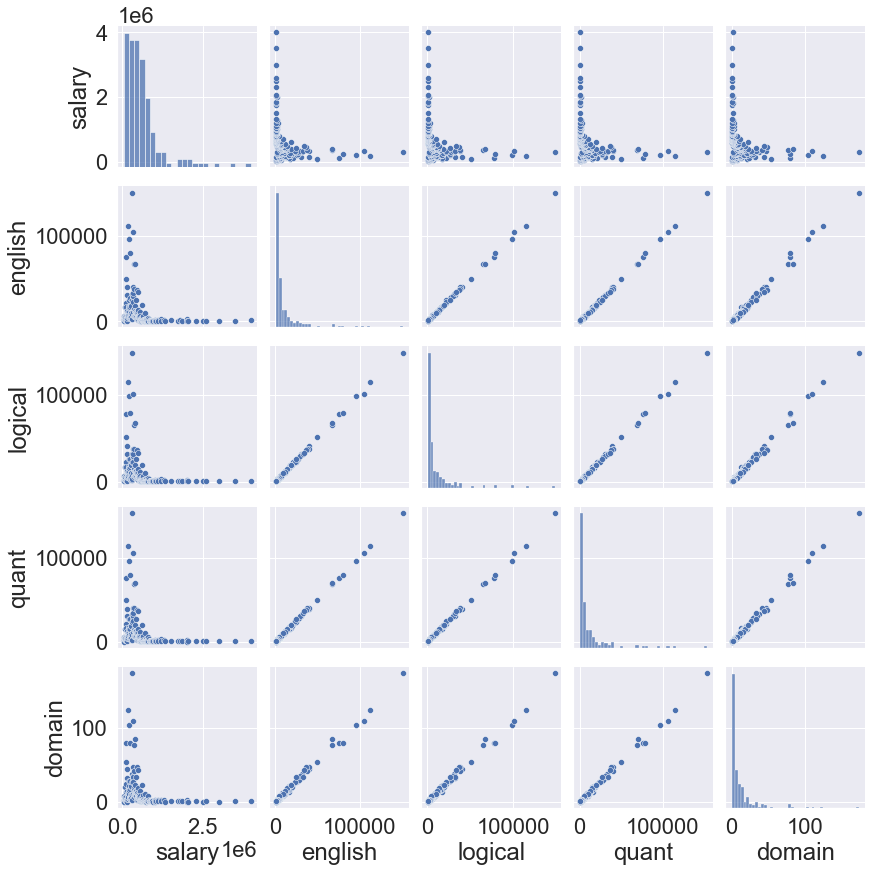

In [107]:
sns.pairplot(df1)

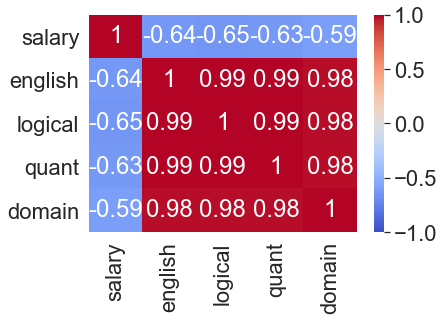

In [108]:
sns.heatmap(df1.corr(method='spearman'), annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')
plt.show()

### observations
- the correltion between any attribute and itself  was one
- the correlation between (english ,salary),(salary,logical),(salary,qunat),(slary,domain) was negative
- the remainig variables had strong positive correlation

In [109]:
df['score'] =df[['english','logical','quant','domain','computerprogramming']].sum(axis =1)


In [110]:
df_salary_score =df.loc[:,['salary','score']]


In [111]:
df_salary_score

,salary,score
id,,
203097,420000,2070.635979
579905,500000,2085.960603
810601,325000,1925.450877
267447,1100000,2460.974396
343523,200000,1635.124502
...,...,...
47916,280000,1519.276047
752781,100000,1685.881620
355888,320000,1820.488348


<AxesSubplot:xlabel='salary', ylabel='score'>

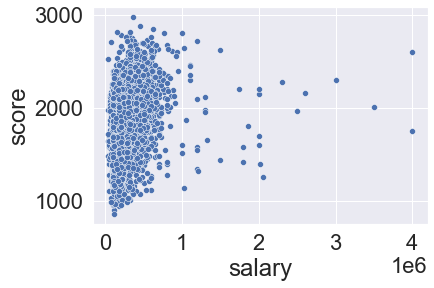

In [112]:
sns.scatterplot(data =df_salary_score,x='salary',y ='score')

### observations
- the sum of score of 'english','logical','quant','domain','computerprogramming' - ranges from nealry 1000 to 3000
- the correlation between salary and scores was negative in most of the cases.
- the highly positive correlation only in case of salary more than 10lakhs and score between 1500 and 2500 
- the extreme values are at 40lakhs and 1700,40lakhs and 2500 


<AxesSubplot:xlabel='score', ylabel='Density'>

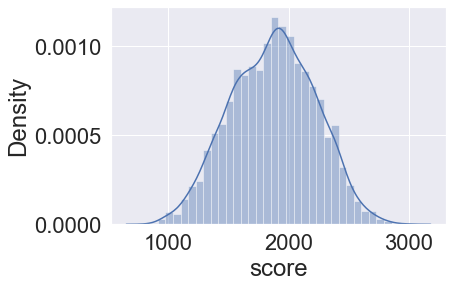

In [113]:
sns.distplot(df_salary_score.score)

### observations
- score values lied between 1000 and 3000
- it was following normal dist.
- mean and median were lied at 2000

### Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.


In [114]:
from scipy.stats import t
import statistics as stats
import scipy.stats
from scipy.stats import norm



Step - 1: $Setting Hypothesis   $                         
Null Hypothesis:
$$𝐻_0: \mu  =300000 $$
 
Alternative Hypothesis:
$$𝐻_1:\mu\neq300000 $$

Step - 2:  $   Selecting Sample $
* Collect a sample of size n = 20 $$  
​ $$
* Compute sample mean $$ \bar{x} \ = \frac{\sum_{i=1}^n{x_i}}{n} $$

Step - 3:
$Compute Test- Statistic:$ $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}}$$ $$ where$$ $$s =\sqrt{\sum_{i=1}^n{(x_i - \bar{x})^2}/(n-1)} $$ 

Step - 4:
Decide $ \alpha $ or significance level :$\alpha =0.05$

Step - 5:  Two tailed t-test: $$ reject \ H_0 \ if \ test-statistic>t-score $$



In [115]:
#Creating the dataframe of computer science students ,specific designations and their salaries
df_s =df.loc[(df.specialization =='computer science & engineering')& (df.designation =='programmer analyst' ) | (df.designation =='software engineer')|(df.designation =='hardware engineer')|(df.designation =='associate engineer'),['salary']]
df_s

,salary
id,
466888,325000
140069,320000
339689,200000
963123,335000
1094324,340000
...,...
212055,550000
1077872,220000
305041,480000


In [116]:
sample_list =list(df_s['salary'])
len(sample_list)

579

In [117]:
import random 
random.seed(0)
small_sample =random.sample(sample_list,20)
small_sample

[310000,
 430000,
 250000,
 180000,
 400000,
 300000,
 355000,
 340000,
 380000,
 205000,
 450000,
 280000,
 335000,
 315000,
 515000,
 300000,
 330000,
 300000,
 240000,
 240000]

In [118]:
#calculating mean
sample_mean =sum(small_sample)/len(small_sample)
print(sample_mean)

322750.0


In [119]:
# calculating sample standard deviation
sample_std =stats.stdev(small_sample)
print(round(sample_std))


83437


In [120]:
# Defining sample statistic and population parameters

sample_size = 20
sample_mean = 322750.0
pop_mean = 300000
sample_std =109283

In [121]:
def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator

In [122]:
t_cal= t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t_cal)

0.9309873720179758


In [123]:
from scipy.stats import t
df = sample_size-1
confidence_level = 0.95
alpha = 1-(confidence_level)
t_critical = t.ppf(1-alpha/2, df)
print(t_critical)

2.093024054408263


Text(322750.0, 3e-07, 'x_bar')

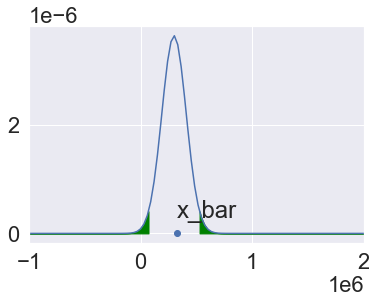

In [124]:
# Defining the x minimum and x maximum
x_min = -1000000
x_max = 2000000


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='green')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='green')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, .0000003))

In [125]:
if(abs(t_cal) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


## Conclusion
>### The claim was correct. i .e. after the completion of graduation from the computer science engineering back ground ,the average salary of a programming analyst , software engineer, hardware engineer,associate engineer was 300000